# **Problem statement:**

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Stage0-DATA ANALYSIS:**

* Stage0-Data Analysis: We have two datasets,  
Dataset:1- All about application present on Google play

 Dataset:2- User reviews of the respective app.
By analysing these two datasets, we must come up with the key factors that are responsible for app engagement with user in 4 stages as follows-
* Stage1- Data Exploration: Exporing Play store data(Dataset-1)/User data(dataset-2)- First we need to explore the type of data present in the dataset and define the contents and the datatype in each column.
*Stage2- Data Handling:Handling NaN values and error values in Play store data(Dataset-1)/User data(dataset-2) -Once we define the the contents in each column, we can identify and handle all the NaN and error values present in the dataset. We can also inspect the datatypes of the values in each column and convert it to an appropriate datatype.
*Stage3- Data Visulization & conclusions: After Data sanity,Now we can analyse the data pipeline and come up with different visualizations.
*Stage-4 Data Analysis Summary:From the visualizations we can come up with insights and the factors responsible for the app engagement with user.

Let's start by importing libraries and dataframes

In [1]:
# Importing the required libraries for operations & visulizations
  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the csv file

play_store_data_path = '/content/drive/MyDrive/almabetter/capstone project python/Google play store app ratings/Play Store Data (1).csv'
user_reviews_data_path='/content/drive/MyDrive/almabetter/capstone project python/Google play store app ratings/User Reviews.csv'
dataset1 = pd.read_csv(play_store_data_path)
dataset2=pd.read_csv(user_reviews_data_path)

# **Stage-1: Data Exploration**
Dataset-1-PLAY STORE DATA

In [4]:
# Viewing the top 5 rows of dataset-1

dataset1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Viewing the bottom 5 rows of the dataset-1

dataset1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
# Finding the number of rows and columns in dataset-1
dataset1.shape

(10841, 13)

There are a total of 10841 rows and 13 columns in dataset-1 

In [7]:
# Columns of this dataset-1 are

dataset1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

***Information contains by each column.***

* `App`: Contains the name of the app.
* `Category`: It gives app category.
* `Rating`: Rating received from users.
* `Reviews`: Number of reviews from users.
* `Size`: Memory required by app.
* `Installs`: Number of times app downloaded apprx
* `Type`:  app is free to use or paid.
* `Price`: price user have to pay to downlaoad & install the app
* `Content rating`: Permission given to use app according to age
* `Genres`: app belongs to mentioned genres
* `Last updated`: date on which app is last update released.
* `Current Ver`: current version of the app.
* `Android Ver`:  android version of the app.

DATASET-2-USER REVIEW ANALYSIS

In [8]:
# Viewing the top 5 rows of dataset-2

dataset2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [9]:
# Viewing the bottom 5 rows of the dataset-2

dataset2.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [10]:
# Finding the number of rows and columns in dataset-2
dataset2.shape

(64295, 5)

There are total 64295 rows and 5 columns in dataset-2

In [11]:
# Columns of this dataset-2 are

dataset2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

***Information contain by each column.***

`App`: Contains the name of the app

`Translated_Review`: English translation of the review dropped by the user of the app in any language.

`Sentiment`: It gives the response of the user ie.‘Positive’, ‘Negative’, ‘Neutral’.

`Sentiment_Polarity`: It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.

`Sentiment_Subjectivity`: This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]

Now we know about given dataframes,we are done with stage-1.
Going forward

# **Stage-2:DATA HANDLING**
Dataset-1- PLAY STORE DATA

In [12]:
# First of all lets find the number of NaN values in each column

dataset1.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

Let us try to handle these NaN values one column at a time starting from column having highest NaN values.



**1. `Rating`: There are a total of 1474 NaN values in this column.**

In [13]:
# The rows containing NaN values in the Rating column

dataset1[dataset1['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


The Rating column contains 1470 NaN values. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.
The NaN values in this case can be replaced by the median of the remaining values in the Rating column.

In [14]:
# By replacing all the NaN values by median of the column
dataset1['Rating'].fillna(dataset1['Rating'].median(),inplace=True)

In [15]:
dataset1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

All the NaN values in `Rating` column is now been replaced by median of the column.

**2. `Current Ver`: There are a total of 8 NaN values in this column.**

In [16]:
# The rows containing NaN values in the Current Ver column

dataset1[dataset1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


Since there are only 8 rows which contain NaN values in the `Current Ver` column, these rows can be dropped.

In [17]:
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.

dataset1 = dataset1[dataset1['Current Ver'].notna()]

In [18]:
# NaN values in each column

dataset1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       0
Android Ver       3
dtype: int64

NaN values in the `Current Ver` column now has been removed

**3-`Android Ver`:There are total of three entries with NaN in the `Android Ver` column.**

Since the NaN values in the Android Ver as there are only 3 rows which contain NaN values in this column, it can be be dropped.

In [19]:
# dropping NaN values in the 'Android Ver' column.

dataset1 = dataset1[dataset1['Android Ver'].notna()]

All three NaN values rows from `Android Ver` has been now removed

**4. `Type`: There is only one NaN value in this column.**

In [20]:
# The row containing NaN values in the Type column

dataset1[dataset1['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [21]:
# Finding the different values the 'Type' column takes

dataset1['Type'].value_counts()

Free    10032
Paid      797
Name: Type, dtype: int64

The `Type` column contains only two entries, namely, `Free` and `Paid`. Also, if the app is of type-`paid`, the price of that app will be printed in the `Price` column, else, it will show as '0'. In this case, the price for the respective app is printed as '0', which means the app is of type-`free`. Hence we can replace this NaN value with `Free`.

In [22]:
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'

dataset1.loc[9148,'Type'] = 'Free'

In [23]:
# Finding the different values the 'Type' column takes

dataset1['Type'].value_counts()

Free    10033
Paid      797
Name: Type, dtype: int64

In [24]:
# NaN values in each column

dataset1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [25]:
# Shape of the updated dataframe

dataset1.shape

(10830, 13)

We were successfully able to handle the NaN values in the 'Type' column as well as from dataset-1 now let us take check with datatypes of all the columns

In [26]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10830 non-null  object 
 1   Category        10830 non-null  object 
 2   Rating          10830 non-null  float64
 3   Reviews         10830 non-null  object 
 4   Size            10830 non-null  object 
 5   Installs        10830 non-null  object 
 6   Type            10830 non-null  object 
 7   Price           10830 non-null  object 
 8   Content Rating  10830 non-null  object 
 9   Genres          10830 non-null  object 
 10  Last Updated    10830 non-null  object 
 11  Current Ver     10830 non-null  object 
 12  Android Ver     10830 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.4+ MB


From the previous task we noticed that Installs and Price were categorized as object data type (not int or float) as we would like. This is because these two columns originally had mixed input types: digits and special characters.

The four features that we will be working with most frequently henceforth are Installs, Size, Rating and Price. While Size and Rating are both float (i.e. purely numerical data types), we still need to work on Installs and Price to make them numeric.

In [27]:
#Removing '$' sign and converting datatype to float
price = []
for i in dataset1['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)

In [28]:
#Changing datatype of Price column

dataset1['Price']=price
dataset1['Price']=dataset1['Price'].astype('float')

In [29]:
#checking Price column
dataset1['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [30]:
#Chceking converison of datatype of Price column
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10830 non-null  object 
 1   Category        10830 non-null  object 
 2   Rating          10830 non-null  float64
 3   Reviews         10830 non-null  object 
 4   Size            10830 non-null  object 
 5   Installs        10830 non-null  object 
 6   Type            10830 non-null  object 
 7   Price           10830 non-null  float64
 8   Content Rating  10830 non-null  object 
 9   Genres          10830 non-null  object 
 10  Last Updated    10830 non-null  object 
 11  Current Ver     10830 non-null  object 
 12  Android Ver     10830 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.4+ MB


Datatype of price column is changed

In [31]:
#Removing ',' & '+' sign from Install column and converting datatype to int
install = []
for j in dataset1['Installs']:
    install.append(j.replace(',','').replace('+','').strip())

dataset1['Installs']= install
dataset1['Installs']= dataset1['Installs'].astype('int')
dataset1['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [32]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10830 non-null  object 
 1   Category        10830 non-null  object 
 2   Rating          10830 non-null  float64
 3   Reviews         10830 non-null  object 
 4   Size            10830 non-null  object 
 5   Installs        10830 non-null  int64  
 6   Type            10830 non-null  object 
 7   Price           10830 non-null  float64
 8   Content Rating  10830 non-null  object 
 9   Genres          10830 non-null  object 
 10  Last Updated    10830 non-null  object 
 11  Current Ver     10830 non-null  object 
 12  Android Ver     10830 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.4+ MB


Datatype of Install column is changed

We can see that the values in the Size column contains data with different units. 'M' stands for MB and 'k' stands for KB. To easily analyse this column, it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.

We know that 1MB = 1024KB, to convert KB to MB, we must divide all the values which are in KB by 1024.

In [33]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

In [34]:
#The kb_to_mb funtion applied to the size column

dataset1['Size'] = dataset1['Size'].apply(lambda x: kb_to_mb(x))

dataset1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In Size column there is Varies with devices which is can't be expected or predicted,so it is left unchanged

It seems there are duplicate application name in first column App of Play store data

In [35]:
#chceking duplicates in App column
dataset1['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

We need to remove this duplicates to get good analysis

In [36]:
#Removing duplicates from App column
dataset1.drop_duplicates(subset = 'App', inplace = True)

In [37]:
#checking duplicates again after removing
dataset1['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
INFAMY RO                                         1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
CK Shop                                           1
                                                 ..
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9649, dtype: int64

In [38]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   object 
 4   Size            9649 non-null   object 
 5   Installs        9649 non-null   int64  
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   float64
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [39]:
# Converting the datatype of the values in the reviews column from string to int

dataset1['Reviews'] = dataset1['Reviews'].astype(int)

In [40]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   int64  
 4   Size            9649 non-null   object 
 5   Installs        9649 non-null   int64  
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   float64
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


Stage-2:DATA HANDLING
Dataset-1- USER DATA

In [41]:
# Finding the total no of NaN values in each column.

dataset2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

There are a lot of NaN values. We need to analyse these values and eliminate or substitute NaN values from each column one by one


In [42]:
# checking the NaN values in the translated rview column
dataset2[dataset2['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Since there are 26868 columns without review so there is no sense of keeping them for further use.

In [43]:
#Removing all NaN values from Translated_Review column

dataset2= dataset2[dataset2['Translated_Review'].notna()]

In [44]:
#Checking NaN values in dataset-2

dataset2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [45]:
dataset2.shape

(37427, 5)

We have successfully comleted Stage-2, now we are entering in Satge-3 to give data visulizations on the given datasets.


# **Stage3-DATA VISULATION & CONCLUSIONS**


**1. Paid app vs Free app**

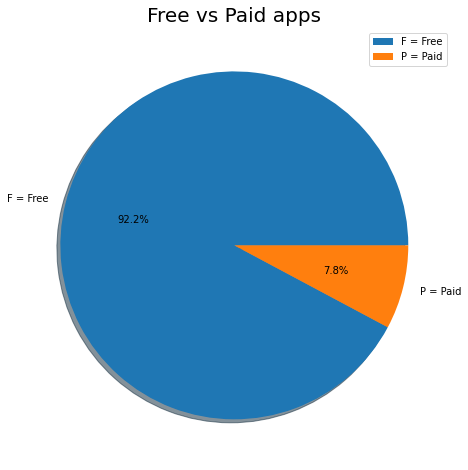

In [46]:
#How many percent of applications are free and how many are paid?
#to check how many apps are free
fig = plt.figure(figsize=(16,8)) 
labels = ['F = Free','P = Paid']
sizes = dataset1['Type'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Free vs Paid apps',size = 20)
plt.legend()
plt.show()

Conclusion:1- There are 92.2% of Free App available on google Play store

**2. Number of Apps avaialble on Google play App category wise**

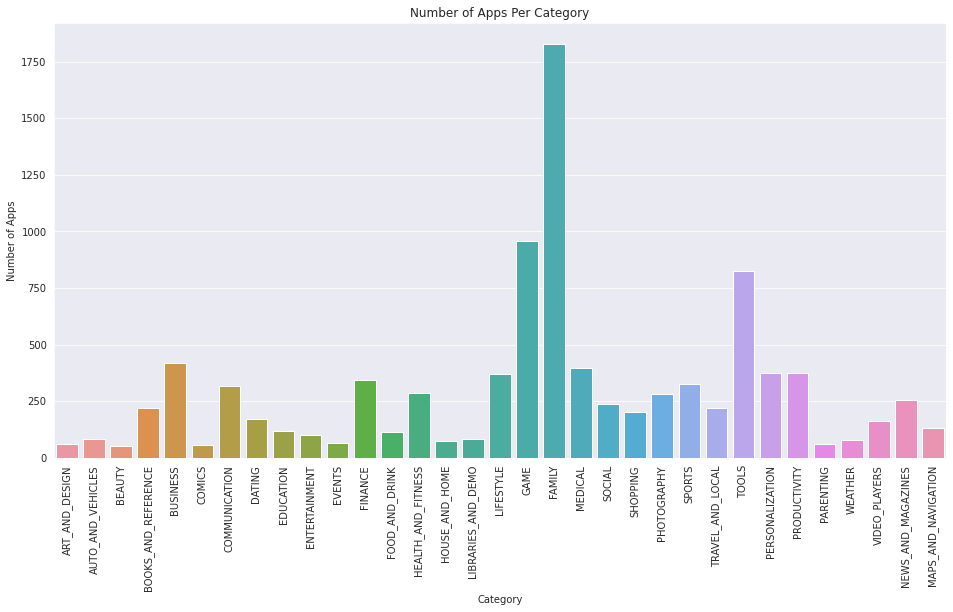

In [47]:
# get the number of apps for each category
sns.set_style('darkgrid')
plt.figure(figsize=(16, 8))
sns.countplot(x='Category', data=dataset1)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()


Conclusion:2- Top 3 categories of App available on google play store are-

First-Family

Second-Games

Third-Tools



**3-App installs in each category of the play store**

Text(0.5, 1.0, 'Total app installs in each category')

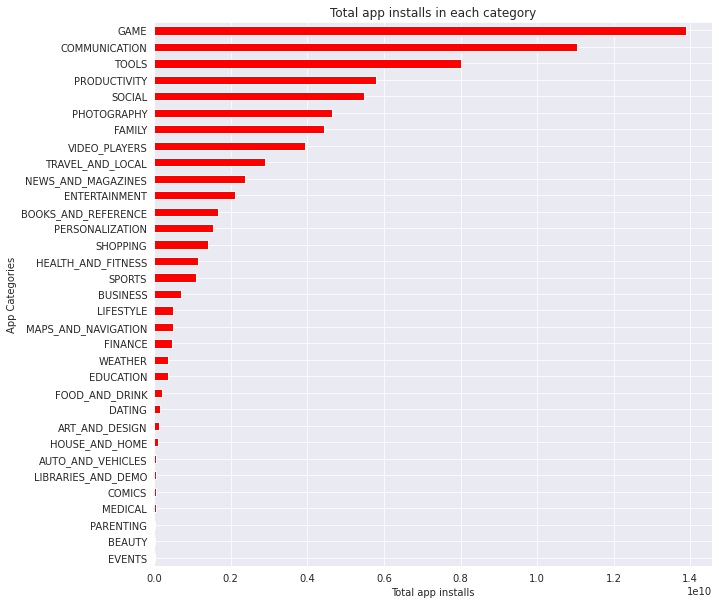

In [48]:
# Total app installs in each category of the play store

a = dataset1.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(10,10), color = 'r')
plt.xlabel('Total app installs')
plt.ylabel('App Categories')
plt.xticks()
plt.title('Total app installs in each category')

Conclusion:3- Higest number of app installed by user is from Games category

**4-Average no of app installs in each category**

Text(0.5, 1.0, 'Average number of app installs in each category')

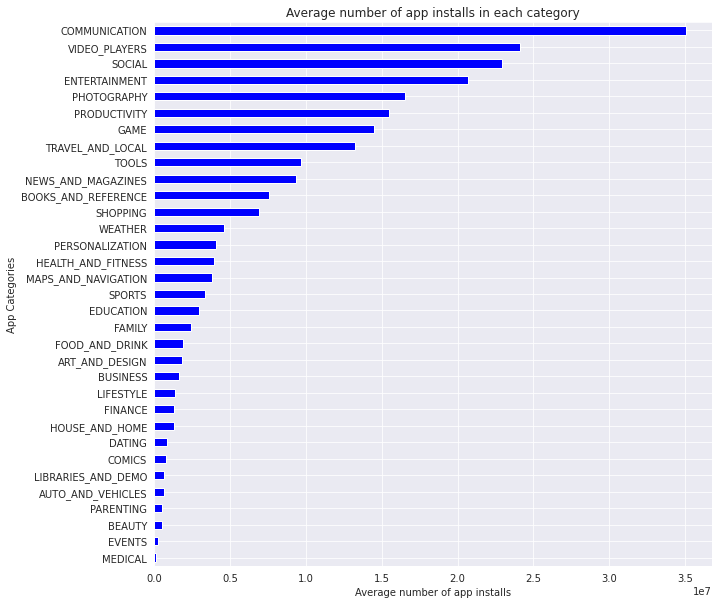

In [49]:
# Average no of app installs in each category of the play store

a = dataset1.groupby(['Category'])['Installs'].mean().sort_values()
a.plot.barh(figsize=(10,10), color = 'b')
plt.xlabel('Average number of app installs')
plt.ylabel('App Categories')
plt.xticks()
plt.title('Average number of app installs in each category')

Conclusion-4: Communication is the highest category in average number of app installs

**5. Category wise average App Rating given by users**

Avg rating:- 4.192475904238781


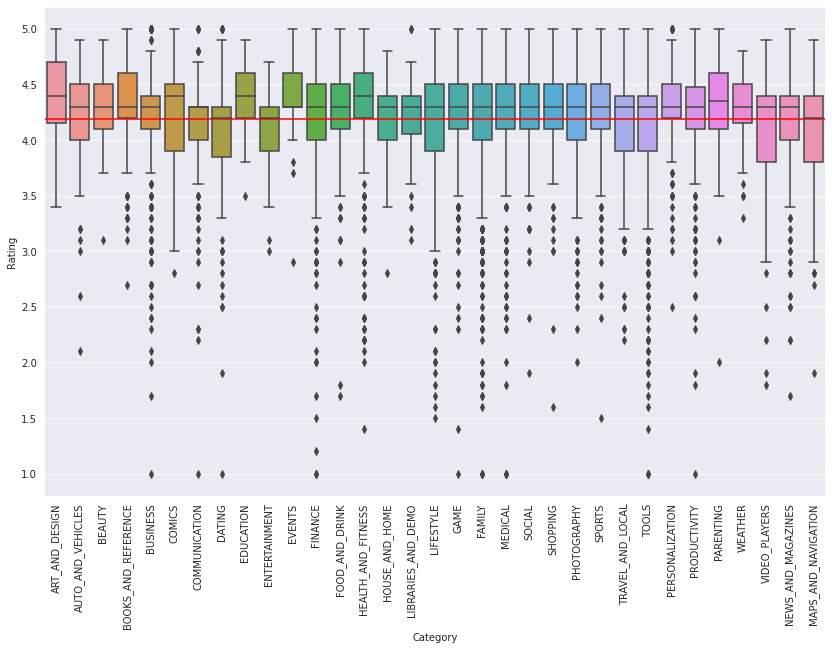

In [50]:
#Compare  the app catagory wise with rating..here we she which catagory get more rating with avg and which is low
plt.figure(figsize=(14,9))


val = sns.boxplot(data=dataset1, x="Category", y="Rating")
val.axhline(dataset1['Rating'].mean(),ls="-",color="red")
x=plt.xticks(rotation=90)
print('Avg rating:-',dataset1['Rating'].mean())

Conclusion-5:Average rating given by user to App is around 4.2 on Google play store

**6. Top 20 apps with higest number of reviews**

Text(0.5, 1.0, 'Top 20 apps with the highest number of user reviews')

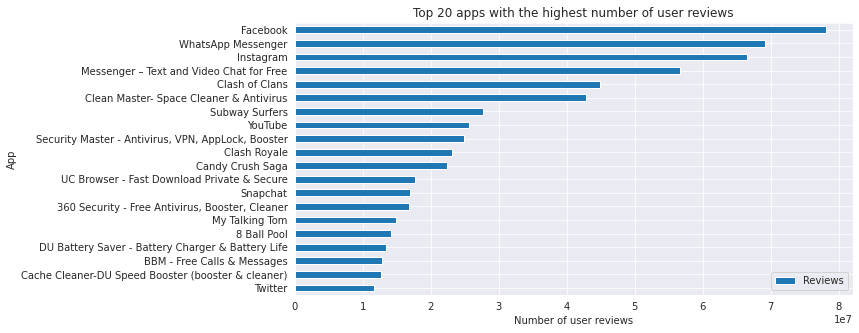

In [51]:
# Top 20 apps with the highest number of user reviews

dataset1.groupby('App')[['Reviews','App']].sum().nlargest(20,['Reviews']).plot.barh(figsize = (10,5)).invert_yaxis()
plt.xlabel('Number of user reviews')
plt.title('Top 20 apps with the highest number of user reviews')

Conclusion6-Facebook and Whatsaap are having maximum reviews on Google play store and there are 20+ apps which has been installed over 1 billion

**7-Content wise app distribution**

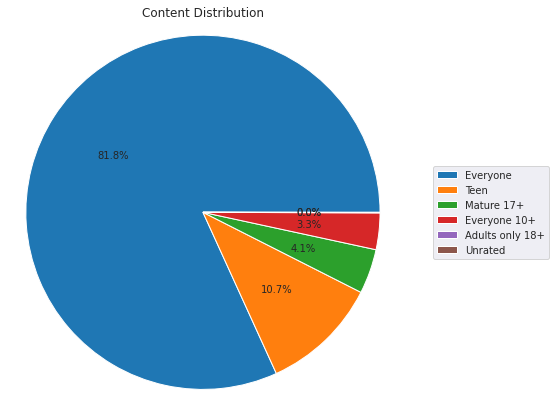

In [52]:
# Diffent type of content of apps in Google play store
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

number_of_apps = dataset1['Content Rating'].value_counts()

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.title('Content Distribution')
plt.show()

Conclusion-7: Maximum apps on play store are available to everyone as per content

**8. Correlation Heatmap**

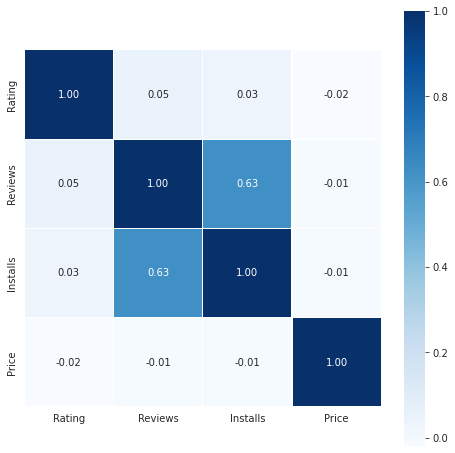

In [53]:
# Correlation heatmap
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(dataset1.corr(), ax=axes, annot=True, cmap=plt.cm.Blues ,linewidths=0.1, fmt='.2f', square=True)
plt.show()

Conclusion-8: 
* There is a strong positive correlation between the `Reviews` and `Installs` column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
* The `Price` is slightly negatively correlated with the `Rating`, `Reviews`, and `Installs`. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.
* the `Rating` is slightly positively correlated with the `Installs` and `Reviews` column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.

**9. Apps with the highest number of positive reviews**

In [54]:
# positive reviews

positive_reviews = dataset2[dataset2['Sentiment'] == 'Positive']
positive_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


Text(0.5, 1.0, 'Apps with the highest number of positive reviews')

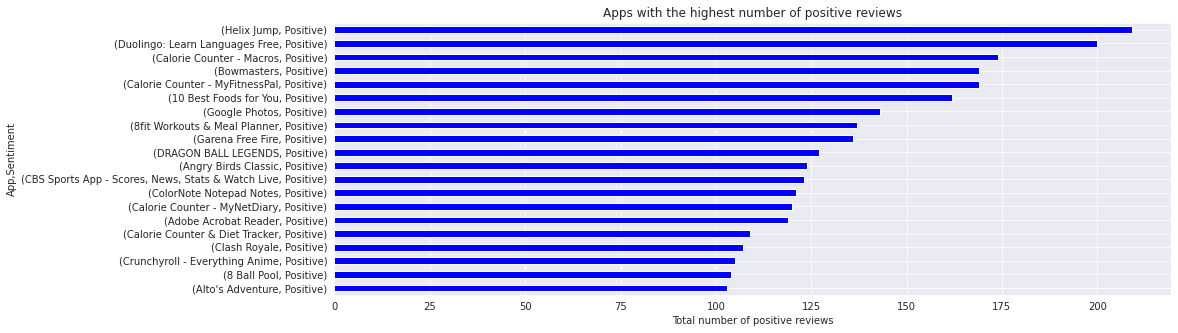

In [55]:
positive_reviews.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(15,5), color='blue').invert_yaxis()
plt.xlabel('Total number of positive reviews')
plt.title('Apps with the highest number of positive reviews')

Conclusion-9: Helix Jump has mamximum number of positive reviews

**10. Apps with the highest number of negative reviews**

In [56]:
# negative reviews

negative_reviews = dataset2[dataset2['Sentiment'] == 'Negative']
negative_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


Text(0.5, 1.0, 'Apps with the highest number of negative reviews')

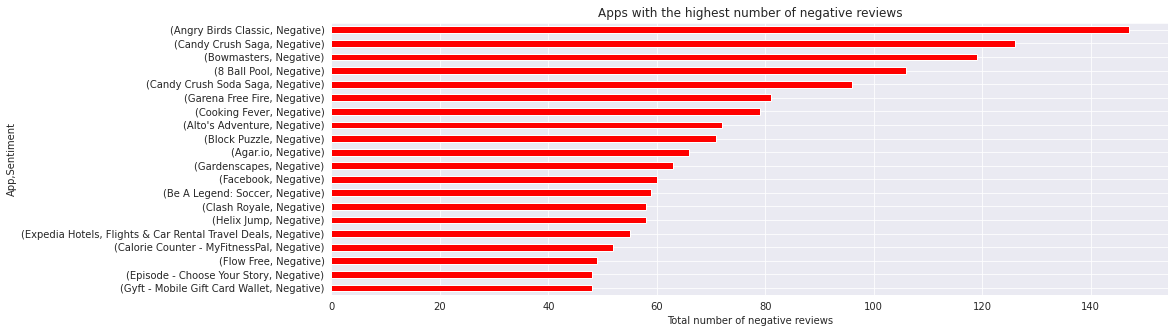

In [57]:
negative_reviews.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(15,5), color='r').invert_yaxis()
plt.xlabel('Total number of negative reviews')
plt.title('Apps with the highest number of negative reviews')

Conclusion-10: Angry Birds classic has mamximum number of negative reviews

**11-Top free app analysis**

In [58]:
# Creating a dataframe for free apps seperately
 
free_app = dataset1[dataset1['Type'] == 'Free']

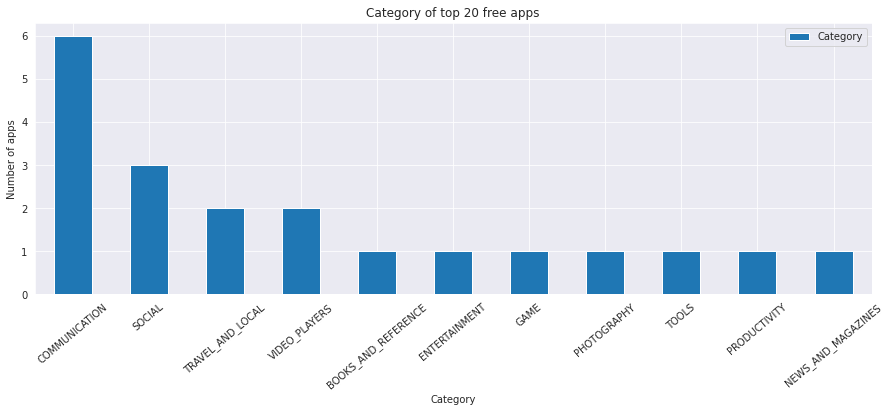

In [59]:
# Top free app analysis
top_free = free_app[free_app['Installs'] == free_app['Installs'].max()]
top_free['Category'].value_counts().plot.bar(figsize=(15,5))
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.title('Category of top 20 free apps')
plt.xticks(rotation=40)
plt.legend()

Conclusion-11: Top free app category is Communication

# **Stage4- Data Analysis* Summary:**

* Percentage of free apps = ~92%
* Most competitive category: Family
* Category with the highest number of installs: Game
* Category with the highest average app installs: Communicaction
* Average rating given by user to App is around 4.2
* Facebook and Whatsaap are having maximum reviews
* There are 20 free apps that have been installed over a billion times
* Maximum apps on play store are available to everyone as per content
* Total number of reviews dropped by the users is directly proportional to number of Installs by user.
* Prices of the app increases, the average rating, total number of reviews but Installs fall with a margin.
* Top free app category is Communication 
* Most popular app in the Play Store based on the number of reviews: Facebook
* Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.